In [149]:
import pandas as pd
import numpy as np

In [150]:
import pandas as pd
import numpy as np

In [151]:
dados_parada = pd.read_csv('../data/dados_limpos.csv')
dados_parada.head()

,data,hora_inicio,hora_termino,numero_os,numero_op,qtde_op,cod_parada,parada,cod_operador,cod_produto_maquina,servico_maquina,total_minutos
0,01/03/2023,17:38:00,18:00:00,107409,18986,180,14,RESOL. DE PROBLEMAS EM O.P. - DEFEITO INTERNO,159,5461,PRE-TESTE,22
1,01/03/2023,17:36:00,17:45:00,7931,2027,10,19,REGISTRO DO APONTAMENTO NO SISTEMA,200,7512,FINALIZAÇÃO DE PRODUTO,9
2,01/03/2023,17:12:00,17:40:00,108345,19212,100,3,TROCA DE O.S.,202,7228,SEPARACAO,28
3,01/03/2023,17:10:00,17:25:00,107433,19695,30,14,RESOL. DE PROBLEMAS EM O.P. - DEFEITO INTERNO,115,6258,MECÂNICA,15
4,01/03/2023,17:05:00,17:15:00,0,0,0,2,NECESSIDADES OU ASSUNTOS PESSOAIS,133,3,TEMPO OCIOSO (SEM ATIVIDADE),10


In [152]:
dados_rfm = pd.DataFrame()
dados_rfm['cod_produto'] = dados_parada['cod_produto_maquina'].unique()

for i in range(len(dados_rfm)):
    cod_produto = dados_rfm['cod_produto'][i]
    quantidade = len(dados_parada[dados_parada['cod_produto_maquina']==cod_produto])
    total = sum(dados_parada[dados_parada['cod_produto_maquina']==cod_produto]['total_minutos'])
    dados_rfm.loc[i, 'quantidade_parada'] = quantidade
    dados_rfm.loc[i, 'tempo_total_minutos'] = total

dados_rfm.sort_values(by='quantidade_parada', ascending=False)

,cod_produto,quantidade_parada,tempo_total_minutos
58,6913,113.0,5496.0
5,6036,103.0,4121.0
13,6096,101.0,4112.0
62,7034,97.0,3555.0
42,25,89.0,1068.0
...,...,...,...
177,6782,1.0,5.0
180,4071,1.0,10.0
185,7402,1.0,9.0
186,7135,1.0,6.0


## F

In [ ]:
q1 = np.percentile(dados_rfm['quantidade_parada'], 25)
q2 = np.percentile(dados_rfm['quantidade_parada'], 50)
q3 = np.percentile(dados_rfm['quantidade_parada'], 75)

dados_rfm['F'] = ''

for i in range(len(dados_rfm)):
    if dados_rfm['quantidade_parada'][i] < q1:
        dados_rfm['F'][i] = 1
    elif dados_rfm['quantidade_parada'][i] < q2:
        dados_rfm['F'][i] = 2
    elif dados_rfm['quantidade_parada'][i] < q3:
        dados_rfm['F'][i] = 3
    else:
        dados_rfm['F'][i] = 4

## M

In [ ]:
q1 = np.percentile(dados_rfm['tempo_total_minutos'], 25)
q2 = np.percentile(dados_rfm['tempo_total_minutos'], 50)
q3 = np.percentile(dados_rfm['tempo_total_minutos'], 75)

dados_rfm['M'] = ''
for i in range(len(dados_rfm)):
    if dados_rfm['tempo_total_minutos'][i] < q1:
        dados_rfm['M'][i] = 1
    elif dados_rfm['tempo_total_minutos'][i] < q2:
        dados_rfm['M'][i] = 2
    elif dados_rfm['tempo_total_minutos'][i] < q3:
        dados_rfm['M'][i] = 3
    else:
        dados_rfm['M'][i] = 4

In [155]:
dados_rfm['FM'] = dados_rfm['F'].astype(str) + dados_rfm['M'].astype(str)
dados_rfm.sort_values(by='quantidade_parada', ascending=False)

,cod_produto,quantidade_parada,tempo_total_minutos,F,M,FM
58,6913,113.0,5496.0,4,4,44
5,6036,103.0,4121.0,4,4,44
13,6096,101.0,4112.0,4,4,44
62,7034,97.0,3555.0,4,4,44
42,25,89.0,1068.0,4,4,44
...,...,...,...,...,...,...
177,6782,1.0,5.0,1,1,11
180,4071,1.0,10.0,1,1,11
185,7402,1.0,9.0,1,1,11
186,7135,1.0,6.0,1,1,11


In [156]:
dados_rfm.count()

cod_produto            221
quantidade_parada      221
tempo_total_minutos    221
F                      221
M                      221
FM                     221
dtype: int64

In [157]:
dados_rfm[dados_rfm['F'] != dados_rfm['M']].count()

cod_produto            56
quantidade_parada      56
tempo_total_minutos    56
F                      56
M                      56
FM                     56
dtype: int64

Gerando gráficos

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

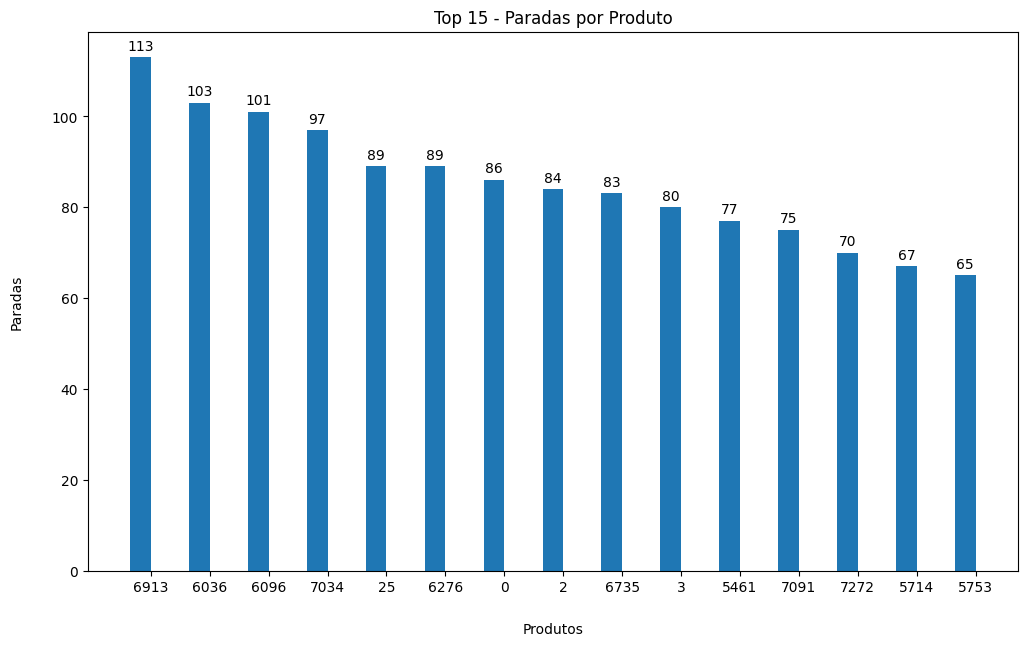

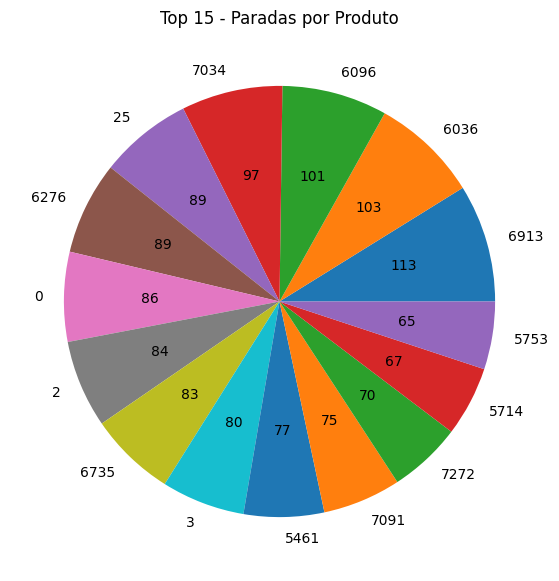

In [159]:
dados_rfm = dados_rfm.sort_values(by='quantidade_parada',ascending=False)
listaProduto = dados_rfm['cod_produto'].astype(str).unique()[:15]

listaParadas = list()
for i in range(len(listaProduto)):
  listaParadas.append(
      dados_rfm[(dados_rfm['cod_produto'] == int(listaProduto[i]))]['quantidade_parada'].sum()
  )

x = np.arange(len(listaProduto)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

ax.set_ylabel('Paradas',labelpad=20)
ax.set_xlabel('Produtos',labelpad=20)
ax.set_title('Top 15 - Paradas por Produto')
ax.set_xticks(x)
ax.set_xticklabels(listaProduto)

pps = ax.bar(x - width/2, listaParadas, width, label='population')
for p in pps:
   height = int(p.get_height())
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

## Gráfico de pizza

def AddLabelInside(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(listaParadas, labels=listaProduto, autopct=AddLabelInside(listaParadas))
ax1.set(aspect="equal", title='Top 15 - Paradas por Produto')
plt.show()

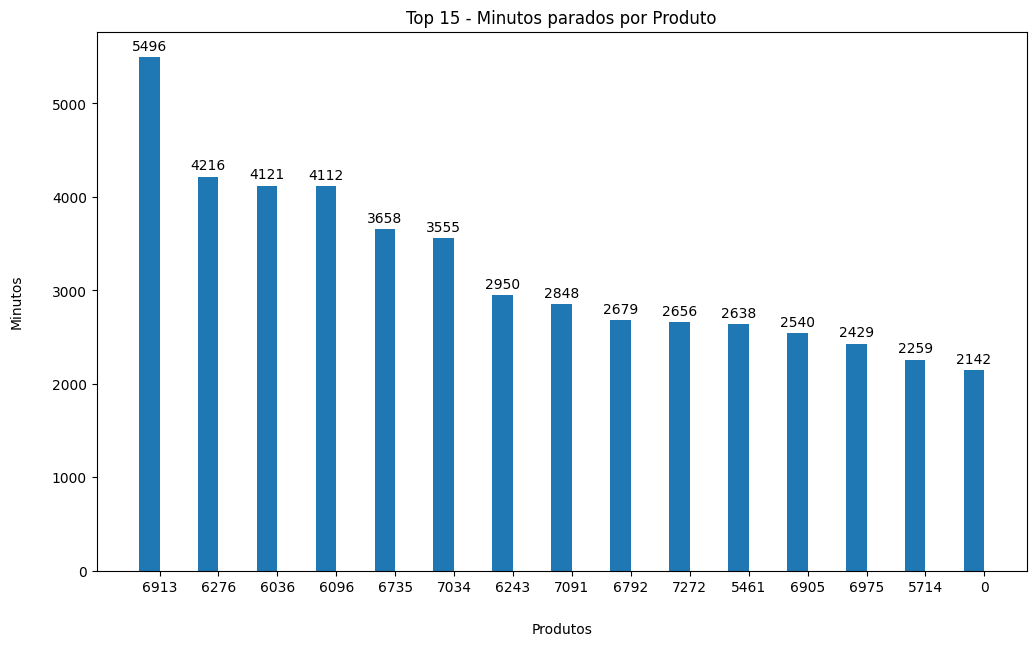

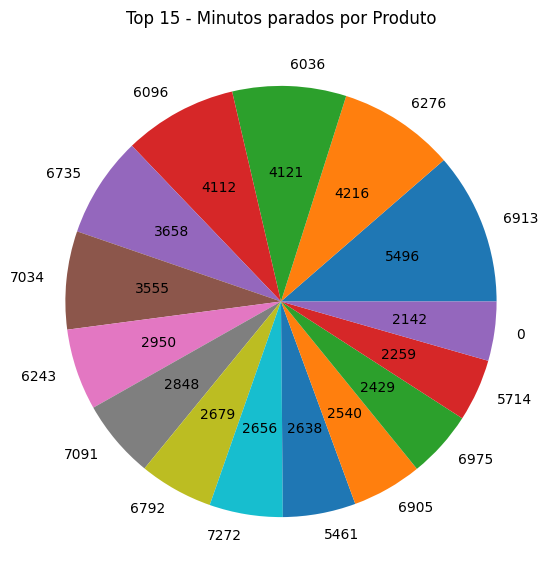

In [160]:
## Gráfico de barras
dados_rfm = dados_rfm.sort_values(by='tempo_total_minutos',ascending=False)
listaProduto = dados_rfm['cod_produto'].astype(str).unique()[:15]

listaMinutos = list()
for i in range(len(listaProduto)):
  listaMinutos.append(
      dados_rfm[(dados_rfm['cod_produto'] == int(listaProduto[i]))
      ]['tempo_total_minutos'].sum()
  )

x = np.arange(len(listaProduto)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

ax.set_ylabel('Minutos',labelpad=20)
ax.set_xlabel('Produtos',labelpad=20)
ax.set_title('Top 15 - Minutos parados por Produto')
ax.set_xticks(x)
ax.set_xticklabels(listaProduto)

pps = ax.bar(x - width/2, listaMinutos, width, label='population')
for p in pps:
   height = int(p.get_height())
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

## Gráfico de pizza

def AddLabelInside(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(listaMinutos, labels=listaProduto, autopct=AddLabelInside(listaMinutos))
ax1.set(aspect="equal", title='Top 15 - Minutos parados por Produto')
plt.show()